### Please access data from our one-drive link mentioned in the mid-term report.
#### The datasets used in this notebook can be found under, "crypto_reddit_data_eda.csv"

In [1]:
import praw
import pandas as pd
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
My_Client_ID = 'KJa61RdZeAQ6VRq9NfiElQ'
My_Client_Secret = 'PJ84Psahlrl0o9TqY7fpWpcxO1BScg'
My_App_Name = 'Testing_APIs'

reddit = praw.Reddit(
    client_id = My_Client_ID,
    client_secret = My_Client_Secret,
    user_agent = My_App_Name
)

In [5]:
with open('crypto_reddit_data_eda.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Cryptocurrency', 'Author', 'Title', 'Score', 'URL', 'Comments', 'Created', 'Content'])

    cryptos = ['btc', 'ethereum', 'Tether', 'binance', 'solana', 'usdcoin', 'ripple', 'steth', 'dogecoin', 'tron']
  
    for crypto in cryptos:
        subreddit = reddit.subreddit(crypto)
  
        for i in subreddit.top(limit=10):
            i.comments.replace_more(limit=0)
            comnts = [comment.body for comment in i.comments.list()]
            created_date = datetime.utcfromtimestamp(i.created_utc).strftime('%b %d, %Y')
            writer.writerow([
                crypto,
                i.author.name if i.author else 'N/A',
                i.title,
                i.score,
                i.url,
                "\n".join(comnts),
                created_date,
                i.selftext
            ])
            
print("Data has been written to crypto_reddit_data_eda.csv")

Data has been written to crypto_reddit_data_eda.csv


In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
# Load the data into a pandas DataFrame
data = pd.read_csv('crypto_reddit_data_eda.csv')

In [9]:
# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Cryptocurrency  88 non-null     object
 1   Author          82 non-null     object
 2   Title           88 non-null     object
 3   Score           88 non-null     int64 
 4   URL             88 non-null     object
 5   Comments        82 non-null     object
 6   Created         88 non-null     object
 7   Content         28 non-null     object
dtypes: int64(1), object(7)
memory usage: 5.6+ KB
None
              Score
count     88.000000
mean   10038.340909
std    20975.669247
min        1.000000
25%      863.750000
50%     2506.500000
75%     6115.500000
max    81174.000000
  Cryptocurrency               Author  \
0            btc  censorship_notifier   
1            btc      PedanticPendant   
2            btc                  NaN   
3            btc          11111101000   
4            btc  

In [11]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Cryptocurrency     0
Author             6
Title              0
Score              0
URL                0
Comments           6
Created            0
Content           60
dtype: int64


C:\Users\jlakh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


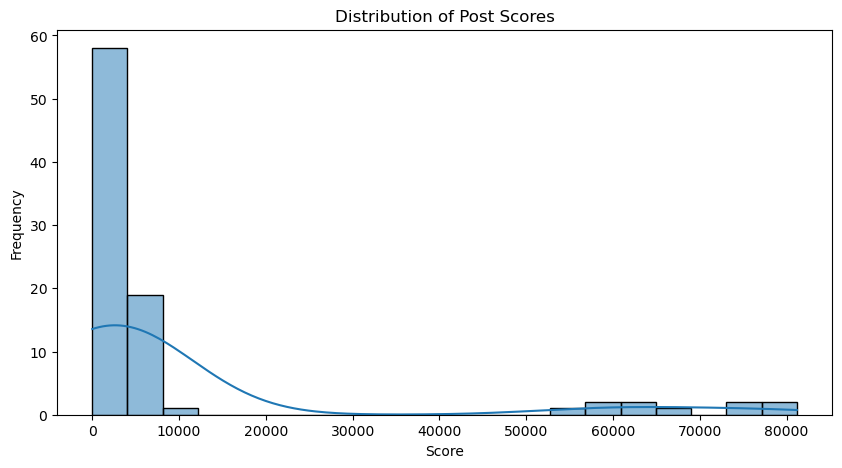

In [15]:
# 1. Distribution of Scores
plt.figure(figsize=(10, 5))
sns.histplot(data['Score'], bins=20, kde=True)
plt.title('Distribution of Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

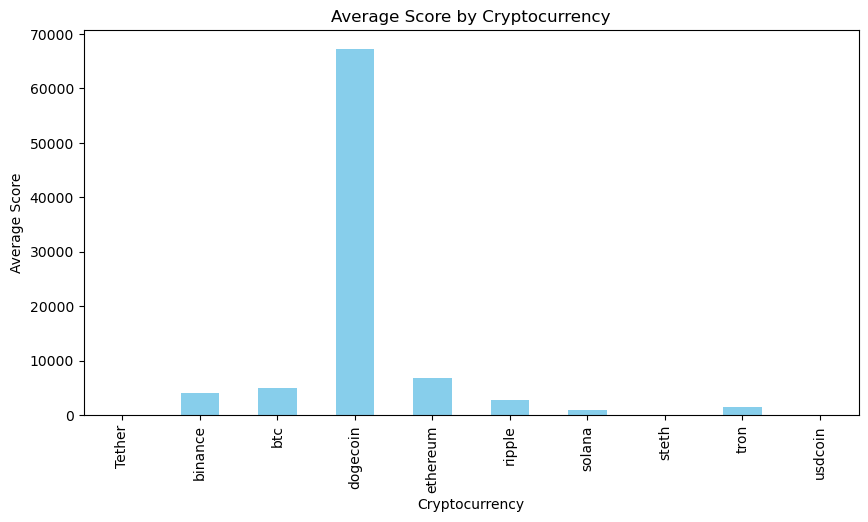

In [17]:
# 2. Average Score by Cryptocurrency
avg_score = data.groupby('Cryptocurrency')['Score'].mean()
plt.figure(figsize=(10, 5))
avg_score.plot(kind='bar', color='skyblue')
plt.title('Average Score by Cryptocurrency')
plt.ylabel('Average Score')
plt.show()

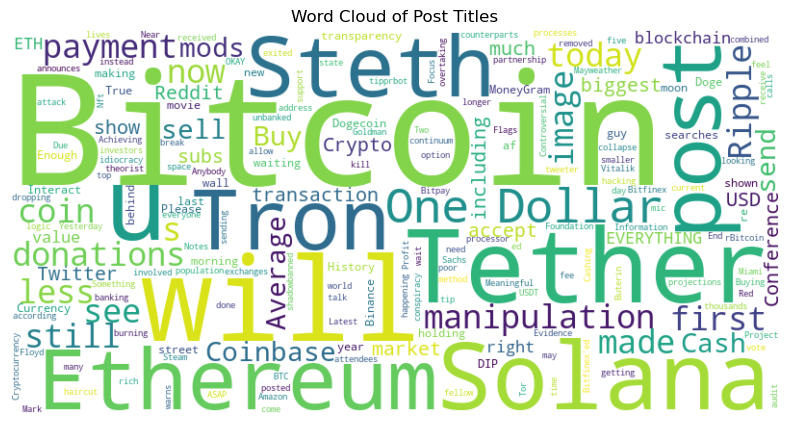

In [19]:
# 3. Word Cloud of Post Titles
all_titles = ' '.join(data['Title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Post Titles')
plt.show()

In [21]:
# 4. Top 5 Highest Scoring Posts
top_posts = data.nlargest(5, 'Score')
print("Top 5 posts by score:\n", top_posts[['Cryptocurrency', 'Title', 'Score', 'Author', 'URL']])

Top 5 posts by score:
    Cryptocurrency                                              Title  Score  \
68       dogecoin                       Who’s still holding $DOGE? 🚀  81174   
69       dogecoin  Hey guys I just became a Dogecoin millionaire ...  78598   
70       dogecoin  One Dollar. Interact with this post and this i...  75613   
71       dogecoin  I'm the original artist behind the Nyan Cat im...  73405   
72       dogecoin  Whoever’s still hodling can only like, if you’...  67725   

                  Author                                  URL  
68                 -dumb  https://i.redd.it/pbznfp8l24f61.jpg  
69  iUsedToCallDogeDodge  https://i.redd.it/69lq8hizuft61.jpg  
70           Jesus666420  https://i.redd.it/njdigtffvlv61.jpg  
71           prguitarman  https://i.redd.it/9z25uxp3q5g61.gif  
72               Seauloo  https://i.redd.it/cumazq8gjsy61.jpg  


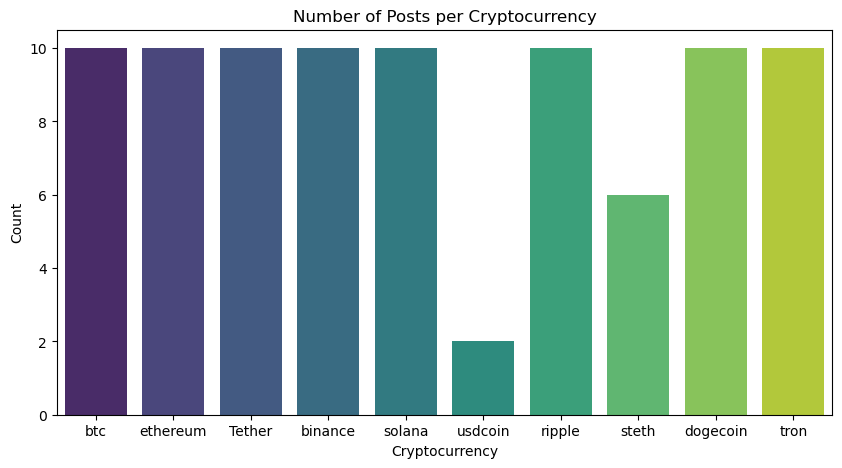

In [23]:
# 5. Posts per Cryptocurrency
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Cryptocurrency', palette='viridis')
plt.title('Number of Posts per Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Count')
plt.show()

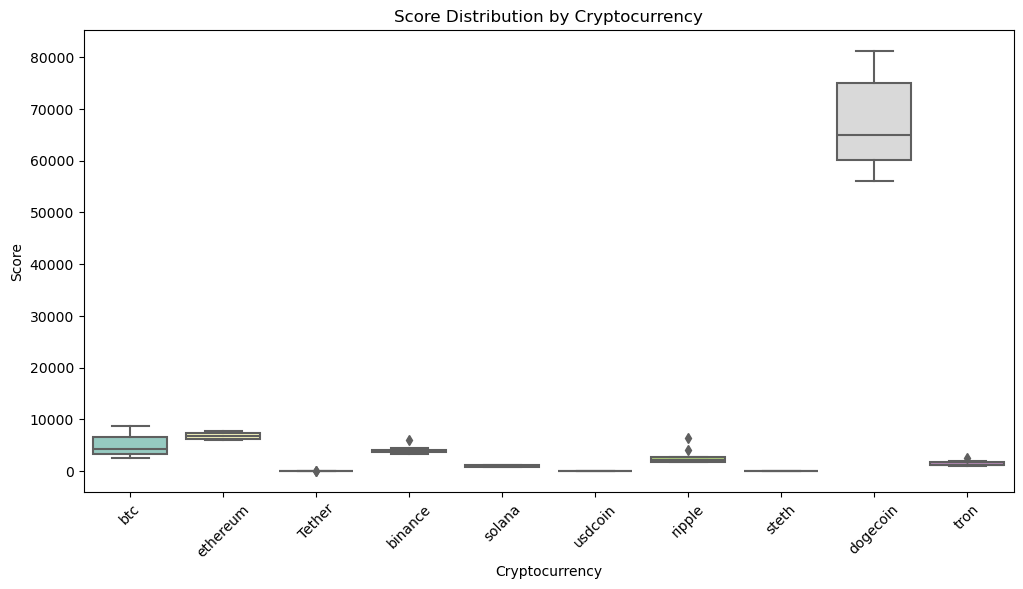

In [25]:
# 6. Score Distribution by Cryptocurrency
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Cryptocurrency', y='Score', palette='Set3')
plt.title('Score Distribution by Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()